In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


- **authors_per_concept.csv**: output of get_num_authors_per_concept.sql on all authors
- **authors_per_year.csv**: output of get_authors_per_year.sql on all authors
- **cites_per_concept_by_work.csv**: output of get_cites_per_concept on all works
- **works_per_concept**: output of get_num_works_per_concept on all works
- **works_per_year**: output of get_works_per_year.sql on all works
---
- **subset_authors_per_concept.csv**: output of get_num_authors_per_concept.sql on authors from 1665-2012
- **subset_authors_per_year.csv**: output of get_authors_per_year.sql on authors from 1665-2012
- **subset_cites_per_concept_by_work.csv**: output of get_cites_per_concept on works from 1665-2012
- **subset_works_per_concept**: output of get_num_works_per_concept on works from 1665-2012
- **subset_works_per_year**: output of get_works_per_year.sql on works from 1665-2012

In [2]:
authors_per_concept = pd.read_csv("authors_per_concept.csv")
authors_per_year = pd.read_csv("authors_per_year.csv")
cites_per_concept_by_work = pd.read_csv("cites_per_concept_by_work.csv")
works_per_concept = pd.read_csv("works_per_concept.csv")
works_per_year = pd.read_csv("works_per_year.csv")

sub_authors_per_concept = pd.read_csv("subset_authors_per_concept.csv")
sub_authors_per_year = pd.read_csv("subset_authors_per_year.csv")
sub_cites_per_concept_by_work = pd.read_csv("subset_cites_per_concept_by_work.csv")
sub_works_per_concept = pd.read_csv("subset_works_per_concept.csv")
sub_works_per_year = pd.read_csv("subset_works_per_year.csv")

# Number of Authors per Concept

## Full Data

In [344]:
authors_per_concept

,concept_0,num_authors
0,NaN,292929
1,Art,263270
2,Biology,3603197
3,Business,296675
4,Chemistry,709025
5,Computer science,4818511
6,Economics,105548
7,Engineering,386574
8,Environmental science,1280423
9,Geography,223515


In [345]:
df = authors_per_concept.fillna("No Top Concept").rename(columns={"num_authors" : "full_num_authors"}).reset_index(drop = True)
df

,concept_0,full_num_authors
0,No Top Concept,292929
1,Art,263270
2,Biology,3603197
3,Business,296675
4,Chemistry,709025
5,Computer science,4818511
6,Economics,105548
7,Engineering,386574
8,Environmental science,1280423
9,Geography,223515


In [346]:
sub_authors_per_concept

,concept_0,num_authors
0,NaN,19131
1,Art,197558
2,Biology,2336814
3,Business,155713
4,Chemistry,550889
5,Computer science,2831161
6,Economics,78294
7,Engineering,240178
8,Environmental science,623933
9,Geography,143604


In [347]:
sub_df = sub_authors_per_concept.fillna("No Top Concept").rename(columns={"num_authors" : "sub_num_authors"}).reset_index(drop = True)
sub_df

,concept_0,sub_num_authors
0,No Top Concept,19131
1,Art,197558
2,Biology,2336814
3,Business,155713
4,Chemistry,550889
5,Computer science,2831161
6,Economics,78294
7,Engineering,240178
8,Environmental science,623933
9,Geography,143604


In [348]:
merge_df = pd.merge(df, sub_df, on = "concept_0")
merge_df.set_index("concept_0", inplace = True)

merge_df

,full_num_authors,sub_num_authors
concept_0,,
No Top Concept,292929,19131
Art,263270,197558
Biology,3603197,2336814
Business,296675,155713
Chemistry,709025,550889
Computer science,4818511,2831161
Economics,105548,78294
Engineering,386574,240178
Environmental science,1280423,623933


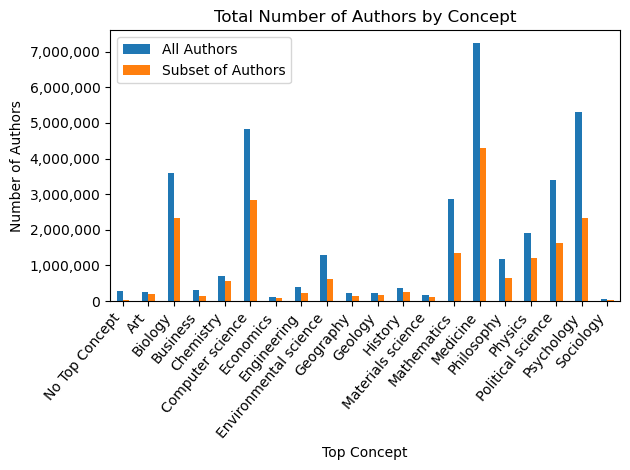

In [350]:
ax = merge_df.plot.bar()

ax.set_xticklabels(merge_df.index, rotation = 50, ha = "right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.xlabel("Top Concept")
plt.ylabel("Number of Authors")
ax.set_title("Total Number of Authors by Concept")

ax.legend(["All Authors", "Subset of Authors"])

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')


plt.show()

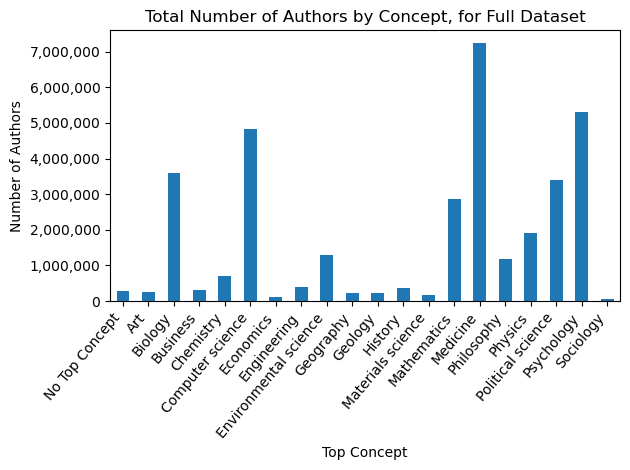

In [352]:
ax = df.plot(x = "concept_0", y = "full_num_authors", kind = "bar", legend = False)
ax.set_xticklabels(df["concept_0"], rotation = 50, ha = "right")
ax.set_xlabel("Top Concept")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of Authors by Concept, for Full Dataset")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

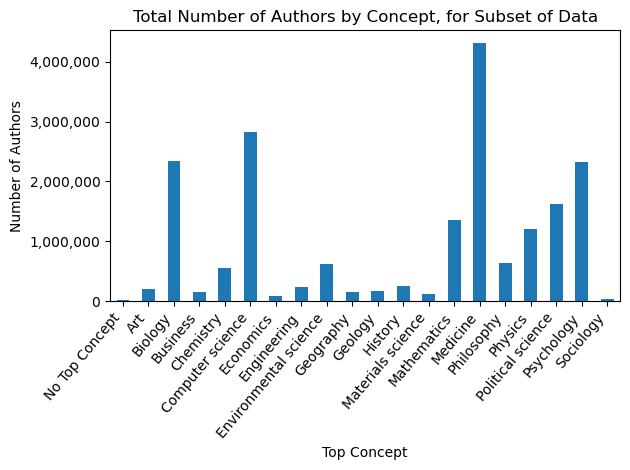

In [353]:
ax = sub_df.plot(x = "concept_0", y = "sub_num_authors", kind = "bar", legend = False)
ax.set_xticklabels(sub_df["concept_0"], rotation = 50, ha = "right")

ax.set_xlabel("Top Concept")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of Authors by Concept, for Subset of Data")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

# Number of Authors per Year

## Full Data

In [354]:
authors_per_year

,start_yr,concept_0,num_authors
0,1920,NaN,22
1,1930,NaN,23
2,1931,NaN,39
3,1932,NaN,72
4,1933,NaN,56
...,...,...,...
5923,1850,Environmental science,11
5924,1854,Environmental science,11
5925,1843,Environmental science,12
5926,1847,Environmental science,12


In [355]:
df = authors_per_year.fillna("No Top Concept").sort_values(["concept_0", "start_yr"])
df

,start_yr,concept_0,num_authors
395,1400,Art,1
527,1476,Art,3
396,1479,Art,1
397,1485,Art,1
398,1493,Art,1
...,...,...,...
3328,2019,Sociology,1966
3329,2020,Sociology,1822
3330,2021,Sociology,1302
3331,2022,Sociology,623


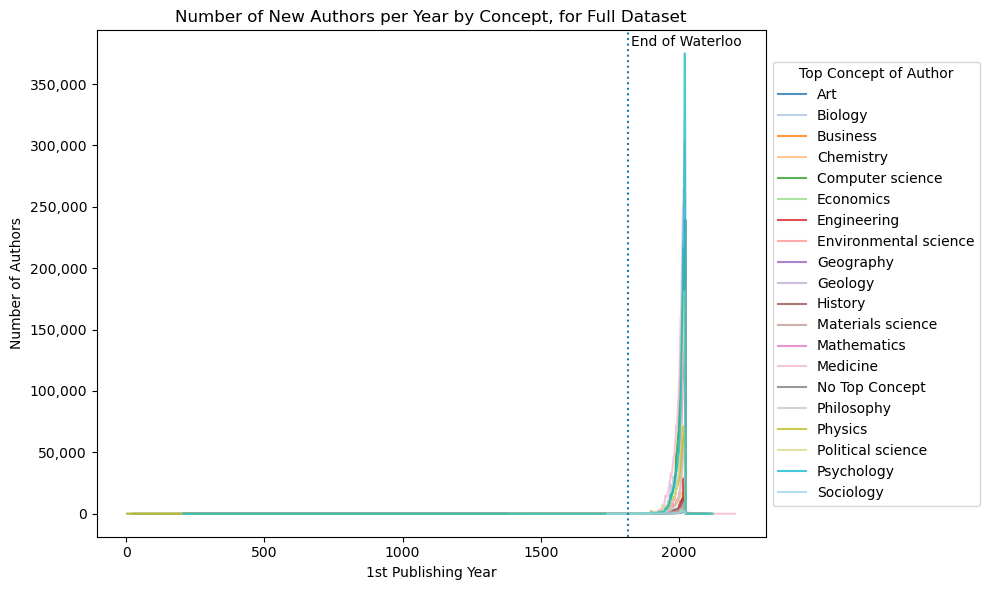

In [356]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key, alpha = 0.8)

plt.axvline(x = 1815, linestyle = ':')
plt.text(1815 + 10, plt.ylim()[1] - 15000, 'End of Waterloo', va='bottom')
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, for Full Dataset")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Subset

In [357]:
sub_df = sub_authors_per_year.fillna("No Top Concept").sort_values(["concept_0", "start_yr"])
sub_df

,start_yr,concept_0,num_authors
395,1666,Art,2
424,1667,Art,3
396,1668,Art,2
425,1669,Art,3
440,1670,Art,4
...,...,...,...
2917,2008,Sociology,1453
2918,2009,Sociology,1647
2919,2010,Sociology,1758
2920,2011,Sociology,1830


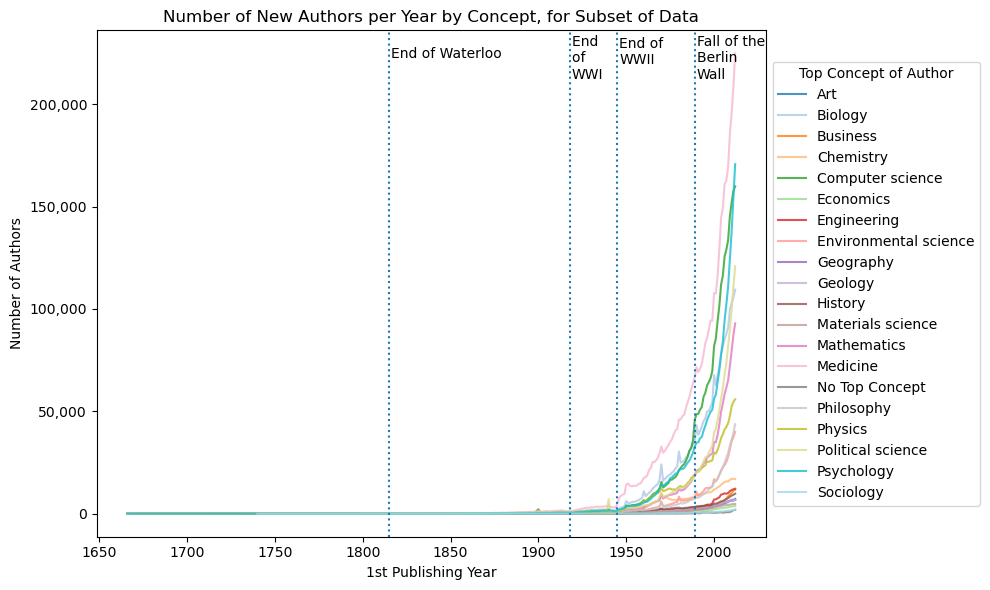

In [358]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in sub_df.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key, alpha = 0.8)

plt.axvline(x = 1815, linestyle = ':')
plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1815 + 1, plt.ylim()[1] - 15000, 'End of Waterloo', va='bottom')
plt.text(1918 + 1, plt.ylim()[1] - 25000, 'End \nof \nWWI', va='bottom')
plt.text(1945 + 1, plt.ylim()[1] - 18000, 'End of \nWWII', va='bottom')
plt.text(1989 + 1, plt.ylim()[1] - 25000, 'Fall of the \nBerlin \nWall', va='bottom')

ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, for Subset of Data")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## 1900-2012

In [359]:
sub_sub_df = sub_df[sub_df["start_yr"] >= 1900].reset_index(drop = True)
sub_sub_df

,start_yr,concept_0,num_authors
0,1900,Art,359
1,1901,Art,246
2,1902,Art,261
3,1903,Art,260
4,1904,Art,261
...,...,...,...
2254,2008,Sociology,1453
2255,2009,Sociology,1647
2256,2010,Sociology,1758
2257,2011,Sociology,1830


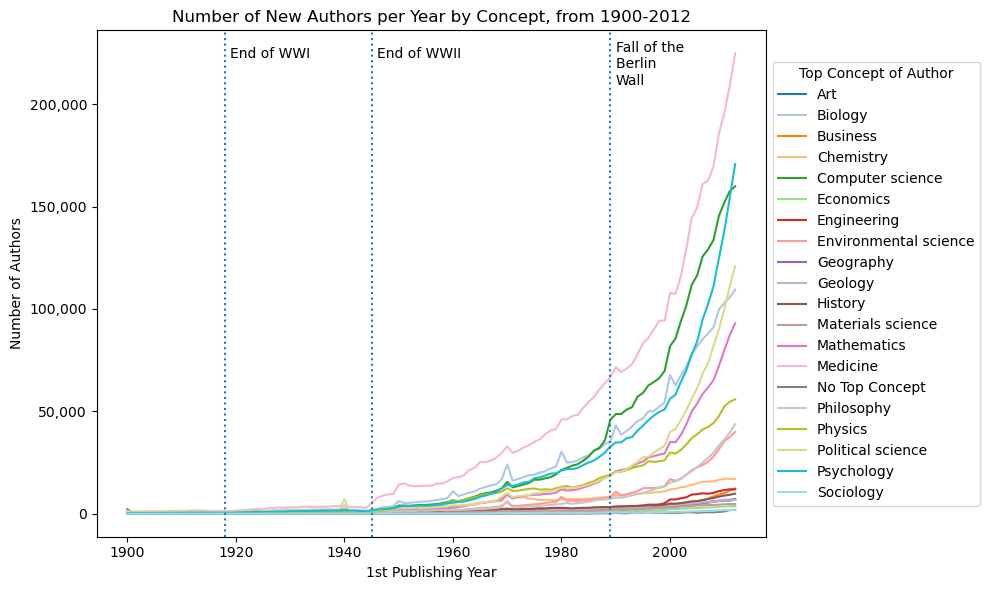

In [360]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in sub_sub_df.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key)

plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1918 + 1, plt.ylim()[1] - 15000, 'End of WWI', va='bottom')
plt.text(1945 + 1, plt.ylim()[1] - 15000, 'End of WWII', va='bottom')
plt.text(1989 + 1, plt.ylim()[1] - 28000, 'Fall of the \nBerlin \nWall', va='bottom')
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, from 1900-2012")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Eras

In [361]:
df1 = df[(df["start_yr"] >= 1810) & (df["start_yr"] <= 1820)]
df1

,start_yr,concept_0,num_authors
181,1810,Art,43
182,1811,Art,28
183,1812,Art,17
184,1813,Art,24
185,1814,Art,29
...,...,...,...
3336,1815,Sociology,1
3337,1816,Sociology,1
3365,1817,Sociology,2
3338,1819,Sociology,1


In [362]:
df2 = df[(df["start_yr"] >= 1913) & (df["start_yr"] <= 1923)]
df2

,start_yr,concept_0,num_authors
284,1913,Art,373
285,1914,Art,316
286,1915,Art,222
287,1916,Art,221
288,1917,Art,196
...,...,...,...
3228,1919,Sociology,19
3229,1920,Sociology,14
3230,1921,Sociology,20
3231,1922,Sociology,22


In [363]:
df3 = df[(df["start_yr"] >= 1940) & (df["start_yr"] <= 1950)]
df3

,start_yr,concept_0,num_authors
311,1940,Art,409
312,1941,Art,342
313,1942,Art,341
314,1943,Art,308
315,1944,Art,293
...,...,...,...
3255,1946,Sociology,60
3256,1947,Sociology,58
3257,1948,Sociology,55
3258,1949,Sociology,77


In [364]:
df4 = df[(df["start_yr"] >= 1984) & (df["start_yr"] <= 1994)]
df4

,start_yr,concept_0,num_authors
355,1984,Art,2286
356,1985,Art,2507
357,1986,Art,2695
358,1987,Art,2667
359,1988,Art,2839
...,...,...,...
3299,1990,Sociology,584
3300,1991,Sociology,523
3301,1992,Sociology,548
3302,1993,Sociology,636


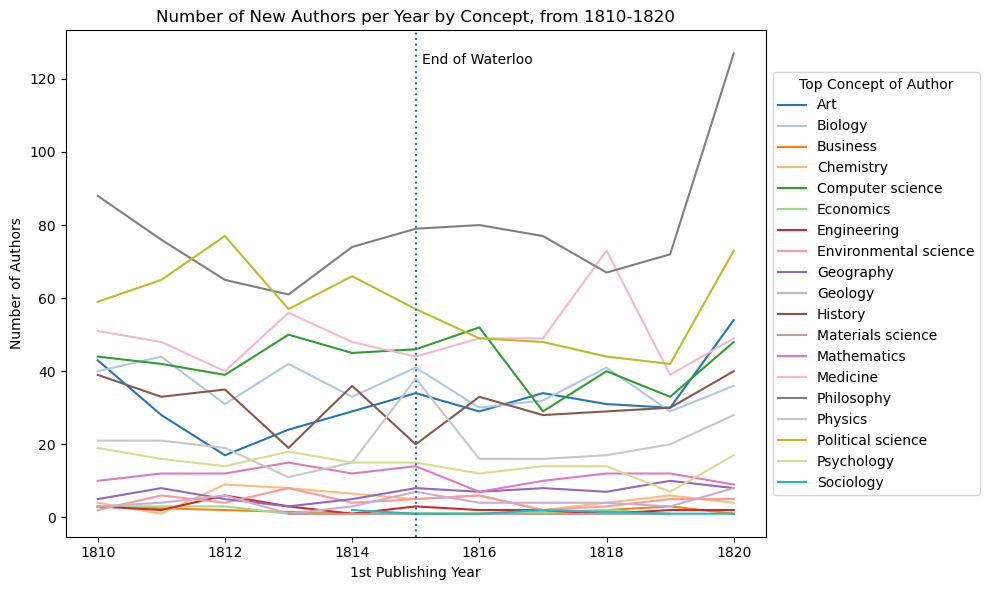

In [365]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df1.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key)

plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 + 0.1, plt.ylim()[1] - 10, 'End of Waterloo', va='bottom')
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, from 1810-1820")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

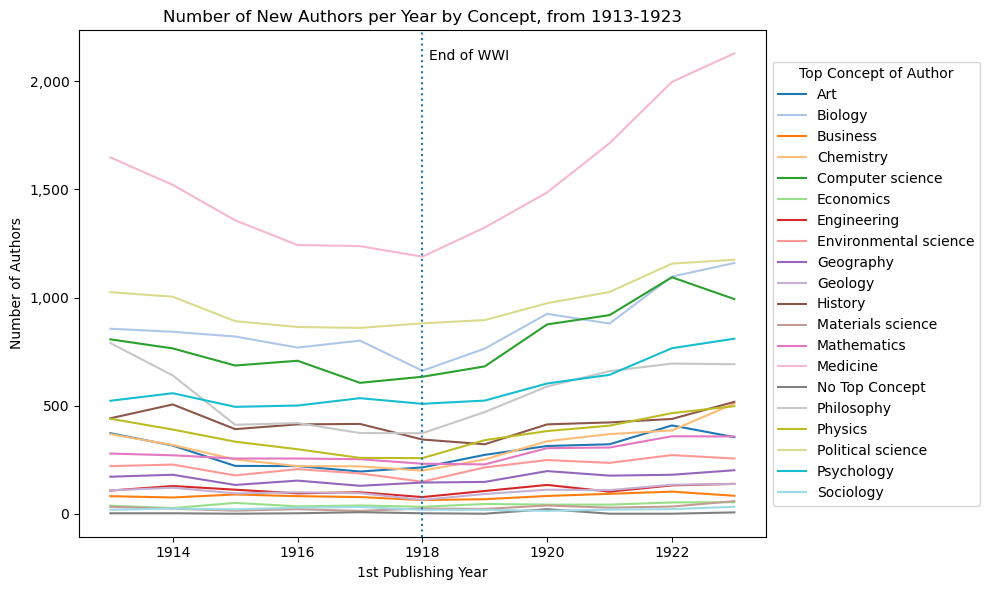

In [366]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df2.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key)

plt.axvline(x = 1918, linestyle = ':')
plt.text(1918 + 0.1, plt.ylim()[1] - 150, 'End of WWI', va='bottom')
    
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, from 1913-1923")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

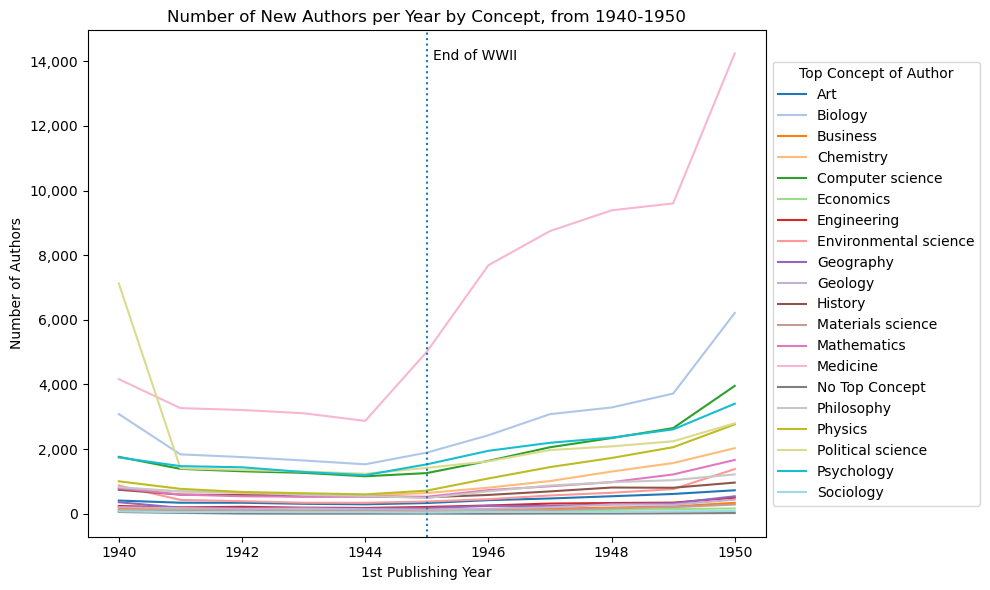

In [367]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df3.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key)

plt.axvline(x = 1945, linestyle = ':')

plt.text(1945 + 0.1, plt.ylim()[1] - 1000, 'End of WWII', va='bottom')
    
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, from 1940-1950")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

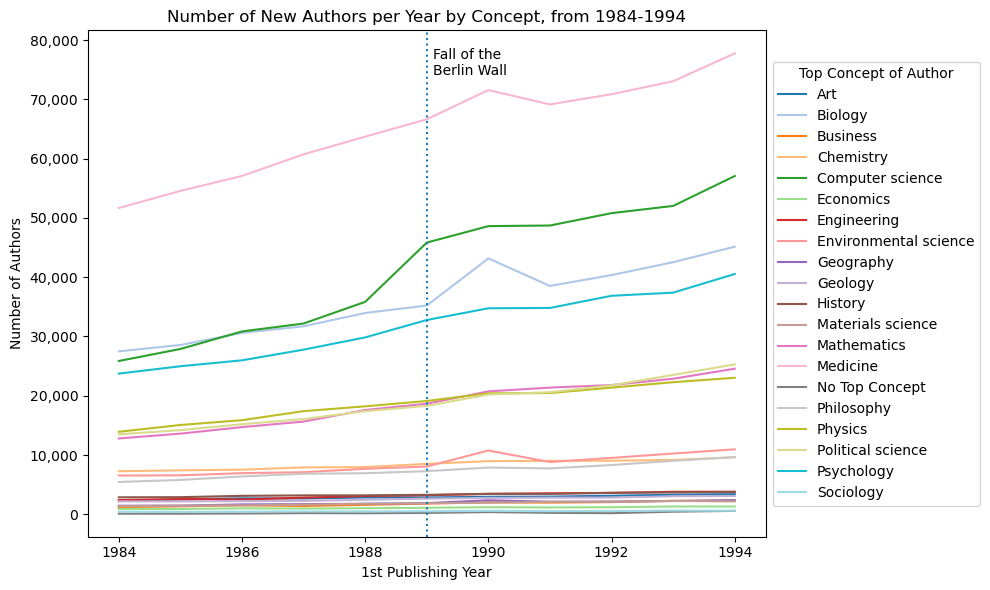

In [368]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df4.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='start_yr', y='num_authors', label=key)


plt.axvline(x = 1989, linestyle = ':')

plt.text(1989 + 0.1, plt.ylim()[1] - 8000, 'Fall of the \nBerlin Wall', va='bottom')
    
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Number of New Authors per Year by Concept, from 1984-1994")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Author")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

# Number of Citations by Concept (grouped by works)

## Full Data

In [369]:
cites_per_concept_by_work

,concept,total_cites
0,NaN,16048
1,Art,5460100
2,History,7470783
3,Philosophy,8076623
4,Engineering,11248415
5,Sociology,21159375
6,Geography,23050412
7,Political science,24465513
8,Economics,26665750
9,Geology,38047466


In [370]:
df = cites_per_concept_by_work.sort_values("concept", na_position = "first").fillna("No Top Concept").rename(columns={"total_cites" : "full_total_cites"})
df

,concept,full_total_cites
0,No Top Concept,16048
1,Art,5460100
18,Biology,300973004
10,Business,39716657
17,Chemistry,262861573
16,Computer science,179836213
8,Economics,26665750
4,Engineering,11248415
12,Environmental science,55836104
6,Geography,23050412


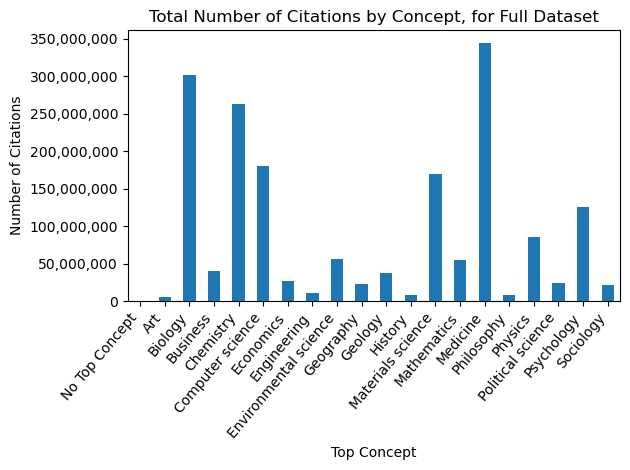

In [371]:
ax = df.plot(x = "concept", y = "full_total_cites", kind = "bar", legend = False)

ax.set_xticklabels(df["concept"], rotation = 50, ha = "right")
ax.set_xlabel("Top Concept")
ax.set_ylabel("Number of Citations")
ax.set_title("Total Number of Citations by Concept, for Full Dataset")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Subset

In [372]:
sub_cites_per_concept_by_work

,concept,total_cites
0,NaN,12266
1,Art,4773759
2,History,6670988
3,Philosophy,7217050
4,Engineering,7377212
5,Sociology,17210015
6,Geography,17742044
7,Political science,19447378
8,Economics,22528019
9,Business,29025215


In [373]:
sub_df = sub_cites_per_concept_by_work.sort_values("concept", na_position = "first").fillna("No Top Concept").rename(columns={"total_cites" : "sub_total_cites"})
sub_df

,concept,sub_total_cites
0,No Top Concept,12266
1,Art,4773759
18,Biology,242824989
9,Business,29025215
17,Chemistry,213750134
16,Computer science,126581155
8,Economics,22528019
4,Engineering,7377212
11,Environmental science,38344710
6,Geography,17742044


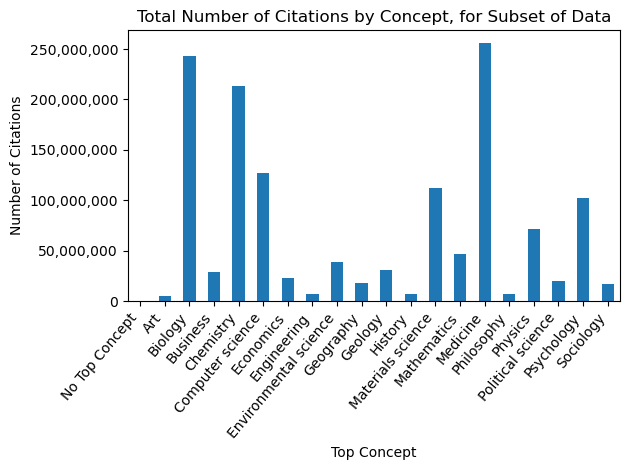

In [374]:
ax = sub_df.plot(x = "concept", y = "sub_total_cites", kind = "bar", legend = False)
ax.set_xticklabels(sub_df["concept"], rotation = 50, ha = "right")
ax.set_xlabel("Top Concept")
ax.set_ylabel("Number of Citations")
ax.set_title("Total Number of Citations by Concept, for Subset of Data")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

In [375]:
merge_df = pd.merge(df, sub_df, on = "concept")
merge_df.set_index("concept", inplace = True)

merge_df

,full_total_cites,sub_total_cites
concept,,
No Top Concept,16048,12266
Art,5460100,4773759
Biology,300973004,242824989
Business,39716657,29025215
Chemistry,262861573,213750134
Computer science,179836213,126581155
Economics,26665750,22528019
Engineering,11248415,7377212
Environmental science,55836104,38344710


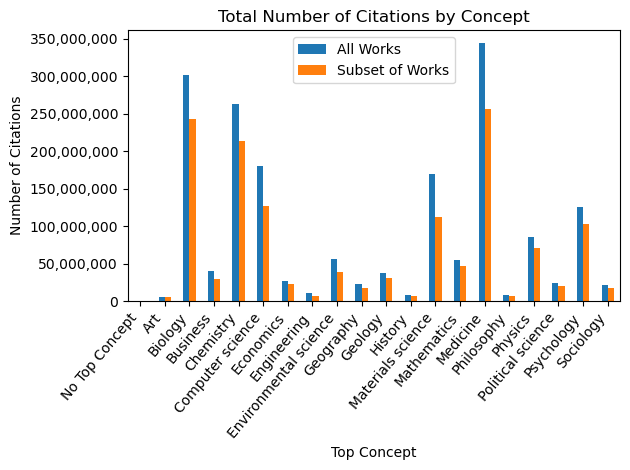

In [376]:
ax = merge_df.plot.bar()

ax.set_xticklabels(merge_df.index, rotation = 50, ha = "right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.xlabel("Top Concept")
plt.ylabel("Number of Citations")
ax.set_title("Total Number of Citations by Concept")

ax.legend(["All Works", "Subset of Works"])


fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

# Number of Works per Concept

## Full Data

In [377]:
works_per_concept

,concept_0,num_works
0,NaN,107774
1,Art,9266034
2,Biology,14499447
3,Business,10638744
4,Chemistry,16814926
5,Computer science,48019483
6,Economics,2892766
7,Engineering,3694111
8,Environmental science,7196159
9,Geography,7732939


In [378]:
df = works_per_concept.fillna("No Top Concept").rename(columns={"num_works" : "full_num_works"})
df

,concept_0,full_num_works
0,No Top Concept,107774
1,Art,9266034
2,Biology,14499447
3,Business,10638744
4,Chemistry,16814926
5,Computer science,48019483
6,Economics,2892766
7,Engineering,3694111
8,Environmental science,7196159
9,Geography,7732939


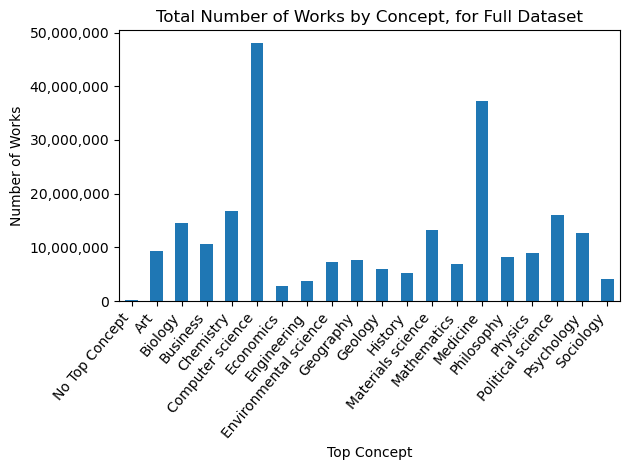

In [379]:
ax = df.plot(x = "concept_0", y = "full_num_works", kind = "bar", legend = False)
ax.set_xticklabels(df["concept_0"], rotation = 50, ha = "right")
ax.set_xlabel("Top Concept")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of Works by Concept, for Full Dataset")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Subset

In [380]:
sub_works_per_concept

,concept_0,num_works
0,NaN,28584
1,Art,5511183
2,Biology,9114431
3,Business,5583021
4,Chemistry,11688116
5,Computer science,27866351
6,Economics,1735238
7,Engineering,2308971
8,Environmental science,4135191
9,Geography,4490989


In [381]:
sub_df = sub_works_per_concept.fillna("No Top Concept").rename(columns={"num_works" : "sub_num_works"})
sub_df

,concept_0,sub_num_works
0,No Top Concept,28584
1,Art,5511183
2,Biology,9114431
3,Business,5583021
4,Chemistry,11688116
5,Computer science,27866351
6,Economics,1735238
7,Engineering,2308971
8,Environmental science,4135191
9,Geography,4490989


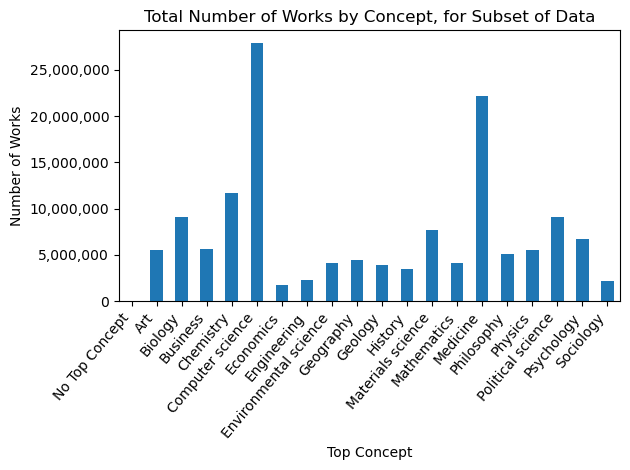

In [382]:
ax = sub_df.plot(x = "concept_0", y = "sub_num_works", kind = "bar", legend = False)
ax.set_xticklabels(sub_df["concept_0"], rotation = 50, ha = "right")
ax.set_xlabel("Top Concept")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of Works by Concept, for Subset of Data")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Merged

In [383]:
merge_df = pd.merge(df, sub_df, on = "concept_0")
merge_df.set_index("concept_0", inplace = True)

merge_df

,full_num_works,sub_num_works
concept_0,,
No Top Concept,107774,28584
Art,9266034,5511183
Biology,14499447,9114431
Business,10638744,5583021
Chemistry,16814926,11688116
Computer science,48019483,27866351
Economics,2892766,1735238
Engineering,3694111,2308971
Environmental science,7196159,4135191


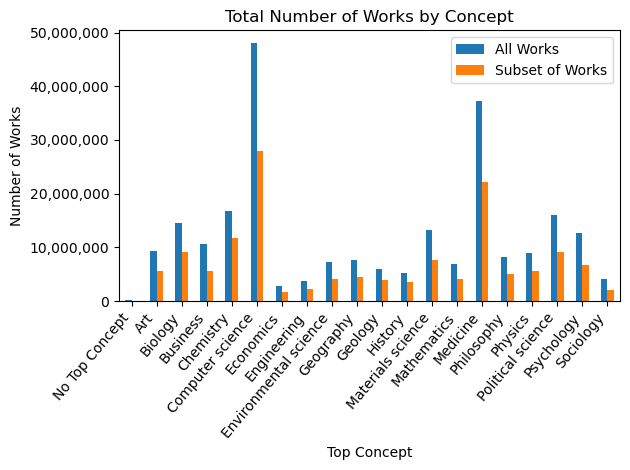

In [385]:
ax = merge_df.plot.bar()

ax.set_xticklabels(merge_df.index, rotation = 50, ha = "right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.xlabel("Top Concept")
plt.ylabel("Number of Works")
ax.set_title("Total Number of Works by Concept")

ax.legend(["All Works", "Subset of Works"])

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

# Number of Works per Year

## Full Data

In [386]:
works_per_year

,publication_year,concept_0,num_works
0,1873.0,NaN,21
1,1917.0,NaN,220
2,1918.0,NaN,164
3,1919.0,NaN,85
4,1926.0,NaN,26
...,...,...,...
7901,1709.0,Environmental science,12
7902,1791.0,Environmental science,12
7903,1633.0,Environmental science,14
7904,1769.0,Environmental science,15


In [387]:
df = works_per_year[works_per_year['publication_year'].notnull()].fillna("No Top Concept").sort_values(["concept_0", "publication_year"])
df["publication_year"] = pd.to_numeric(df["publication_year"], downcast = "integer")
df

,publication_year,concept_0,num_works
542,195,Art,1
543,207,Art,1
676,221,Art,5
544,1019,Art,1
545,1197,Art,1
...,...,...,...
4542,2105,Sociology,1
4543,2106,Sociology,1
4555,2114,Sociology,2
4556,2115,Sociology,2


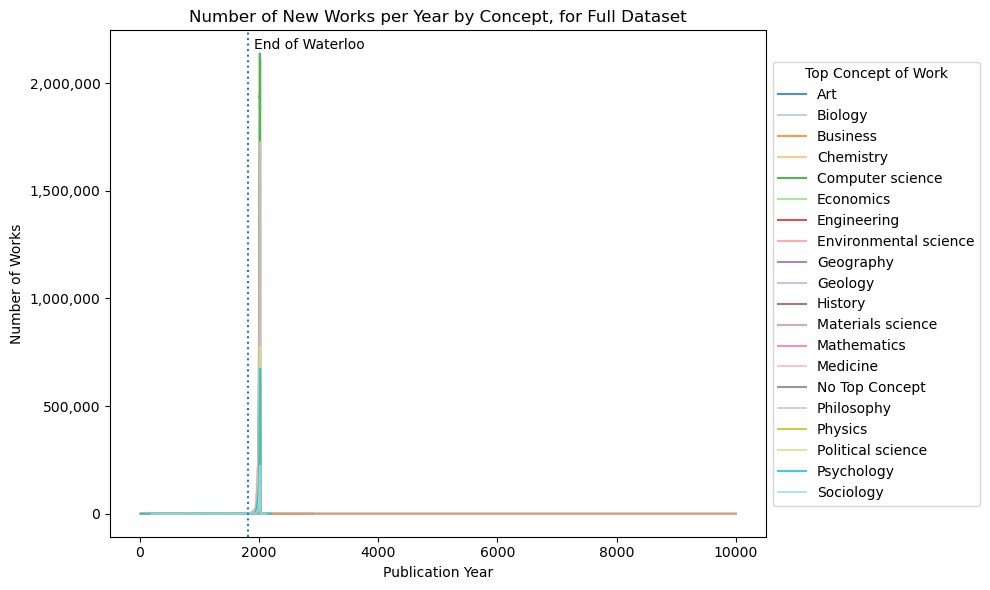

In [388]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='num_works', label=key, alpha = 0.8)
    
plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 + 100, plt.ylim()[1] - 100000, 'End of Waterloo', va='bottom')   
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, for Full Dataset")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Subset

In [389]:
sub_works_per_year

,publication_year,concept_0,num_works
0,1873,NaN,21
1,1917,NaN,220
2,1918,NaN,164
3,1919,NaN,85
4,1926,NaN,26
...,...,...,...
6196,1791,Environmental science,12
6197,1769,Environmental science,15
6198,1789,Environmental science,15
6199,1711,Environmental science,17


In [390]:
sub_df = sub_works_per_year.fillna("No Top Concept").rename(columns={"num_works": "sub_num_works"}).sort_values(["concept_0", "publication_year"])
sub_df

,publication_year,concept_0,sub_num_works
528,1666,Art,18
501,1667,Art,8
186,1668,Art,21
529,1669,Art,18
187,1670,Art,30
...,...,...,...
3552,2008,Sociology,119859
3553,2009,Sociology,133724
3554,2010,Sociology,146617
3555,2011,Sociology,157437


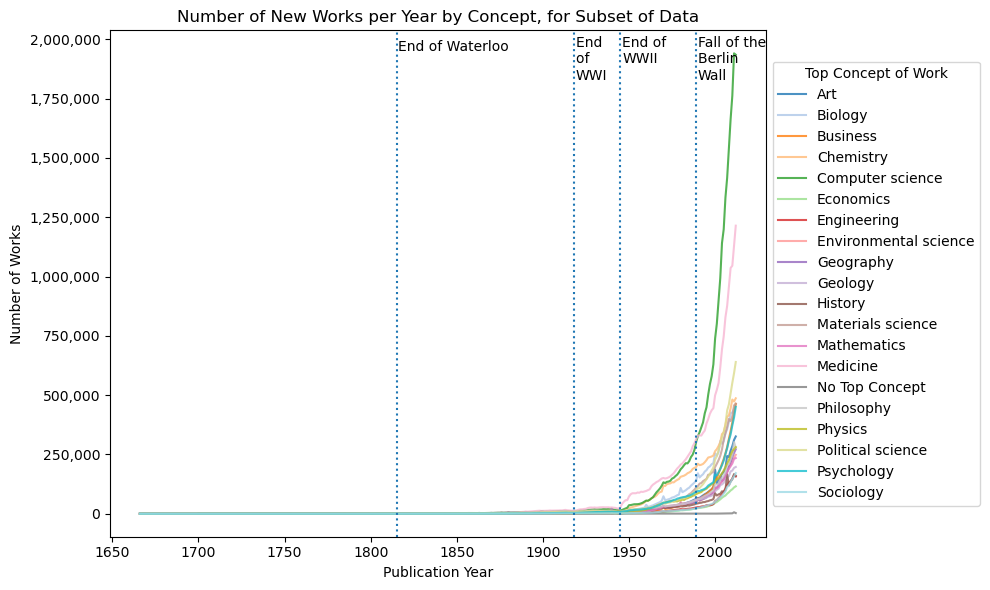

In [391]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in sub_df.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='sub_num_works', label=key, alpha = 0.8)

plt.axvline(x = 1815, linestyle = ':')
plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1815 + 1, plt.ylim()[1] - 100000, 'End of Waterloo', va='bottom')
plt.text(1918 + 1, plt.ylim()[1] - 220000, 'End \nof \nWWI', va='bottom')
plt.text(1945 + 1, plt.ylim()[1] - 150000, 'End of \nWWII', va='bottom')
plt.text(1989 + 1, plt.ylim()[1] - 220000, 'Fall of the \nBerlin \nWall', va='bottom') 
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, for Subset of Data")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

In [392]:
sub_sub_df = sub_df[(sub_df["publication_year"] >= 1900)].reset_index(drop = True)
sub_sub_df

,publication_year,concept_0,sub_num_works
0,1900,Art,7228
1,1901,Art,6336
2,1902,Art,6360
3,1903,Art,6410
4,1904,Art,6972
...,...,...,...
2255,2008,Sociology,119859
2256,2009,Sociology,133724
2257,2010,Sociology,146617
2258,2011,Sociology,157437


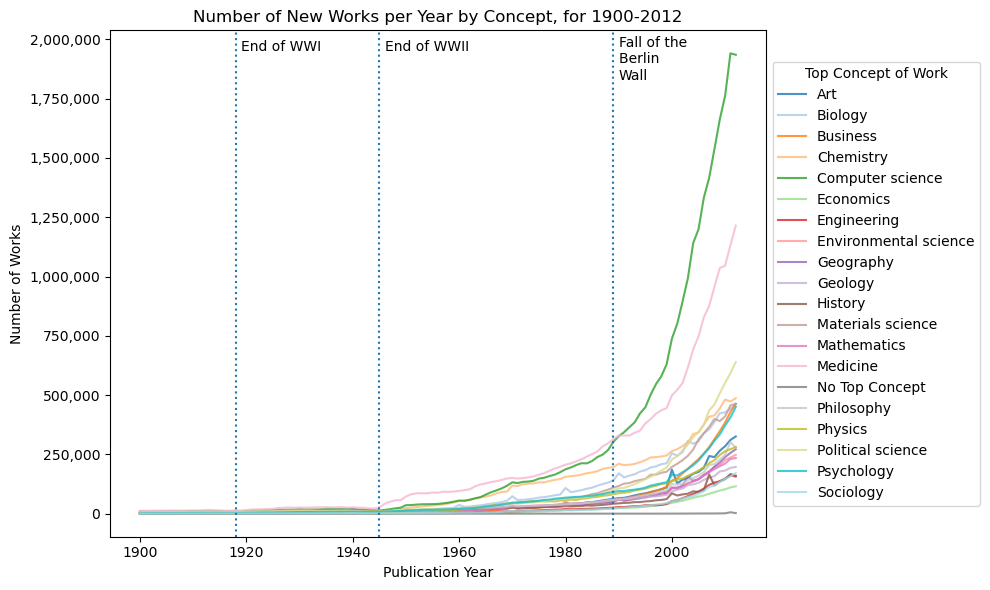

In [393]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in sub_sub_df.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='sub_num_works', label=key, alpha = 0.8)

plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1918 + 1, plt.ylim()[1] - 100000, 'End of WWI', va='bottom')
plt.text(1945 + 1, plt.ylim()[1] - 100000, 'End of WWII', va='bottom')
plt.text(1989 + 1, plt.ylim()[1] - 220000, 'Fall of the \nBerlin \nWall', va='bottom') 
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, for 1900-2012")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

In [276]:
temp = df[(df["publication_year"] >= 1900) & (df["publication_year"] < 2023)].reset_index(drop = True)
temp

,publication_year,concept_0,num_works
0,1900,Art,7228
1,1901,Art,6336
2,1902,Art,6360
3,1903,Art,6410
4,1904,Art,6972
...,...,...,...
2455,2018,Sociology,205043
2456,2019,Sociology,204192
2457,2020,Sociology,222505
2458,2021,Sociology,212859


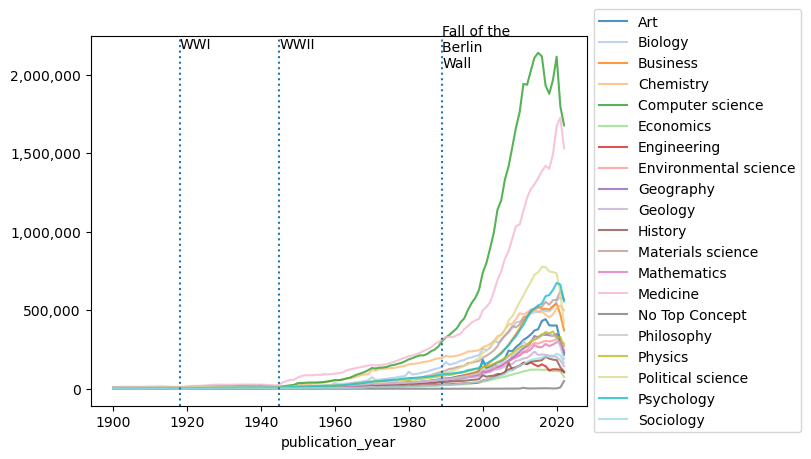

In [277]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in temp.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='num_works', label=key, alpha = 0.8)

# plt.axvline(x = 1815, linestyle = ':')
plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

# plt.text(1815, plt.ylim()[1] - 100000, 'Waterloo', va='bottom')
plt.text(1918, plt.ylim()[1] - 100000, 'WWI', va='bottom')
plt.text(1945, plt.ylim()[1] - 100000, 'WWII', va='bottom')
plt.text(1989, plt.ylim()[1] - 220000, 'Fall of the \nBerlin \nWall', va='bottom') 
    
# plt.legend(loc='best')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

## Eras

In [394]:
df1 = df[(df["publication_year"] >= 1810) & (df["publication_year"] <= 1820)]
df1

,publication_year,concept_0,num_works
325,1810,Art,491
326,1811,Art,427
327,1812,Art,341
328,1813,Art,313
329,1814,Art,400
...,...,...,...
4566,1816,Sociology,4
4586,1817,Sociology,12
4582,1818,Sociology,11
4574,1819,Sociology,8


In [395]:
df2 = df[(df["publication_year"] >= 1913) & (df["publication_year"] <= 1923)]
df2

,publication_year,concept_0,num_works
428,1913,Art,8463
429,1914,Art,7710
430,1915,Art,5868
431,1916,Art,6118
432,1917,Art,5703
...,...,...,...
4384,1919,Sociology,821
4385,1920,Sociology,1007
4386,1921,Sociology,971
4387,1922,Sociology,948


In [396]:
df3 = df[(df["publication_year"] >= 1940) & (df["publication_year"] <= 1950)]
df3

,publication_year,concept_0,num_works
455,1940,Art,9168
456,1941,Art,8046
457,1942,Art,7513
458,1943,Art,7245
459,1944,Art,6596
...,...,...,...
4411,1946,Sociology,1920
4412,1947,Sociology,2095
4413,1948,Sociology,2298
4414,1949,Sociology,2372


In [397]:
df4 = df[(df["publication_year"] >= 1984) & (df["publication_year"] <= 1994)]
df4

,publication_year,concept_0,num_works
499,1984,Art,47092
500,1985,Art,49024
501,1986,Art,52433
502,1987,Art,55736
503,1988,Art,59371
...,...,...,...
4455,1990,Sociology,24303
4456,1991,Sociology,25437
4457,1992,Sociology,27050
4458,1993,Sociology,29246


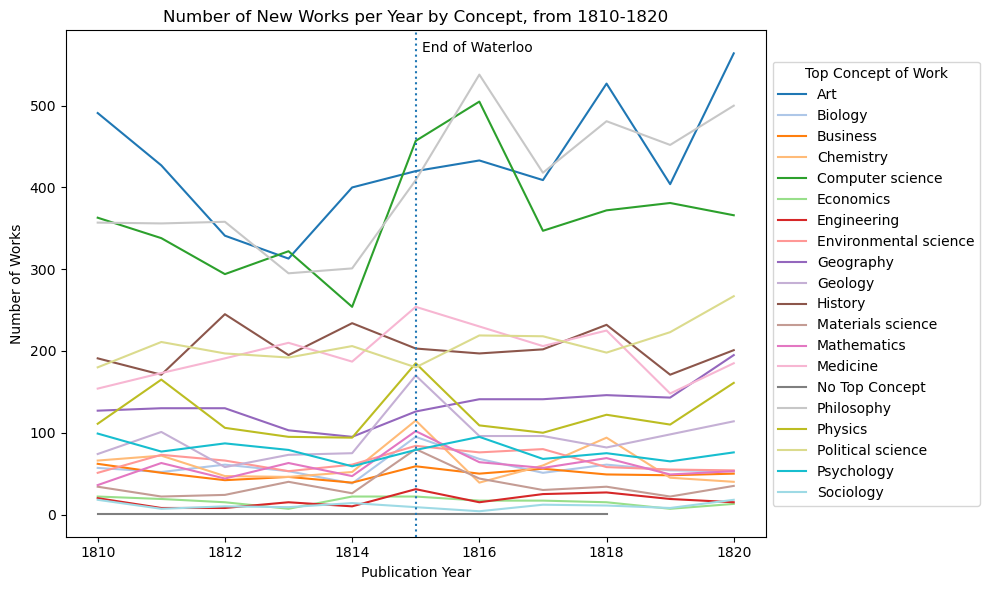

In [400]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df1.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='num_works', label=key)

plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 + 0.1, plt.ylim()[1] - 30, 'End of Waterloo', va='bottom')
    
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, from 1810-1820")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

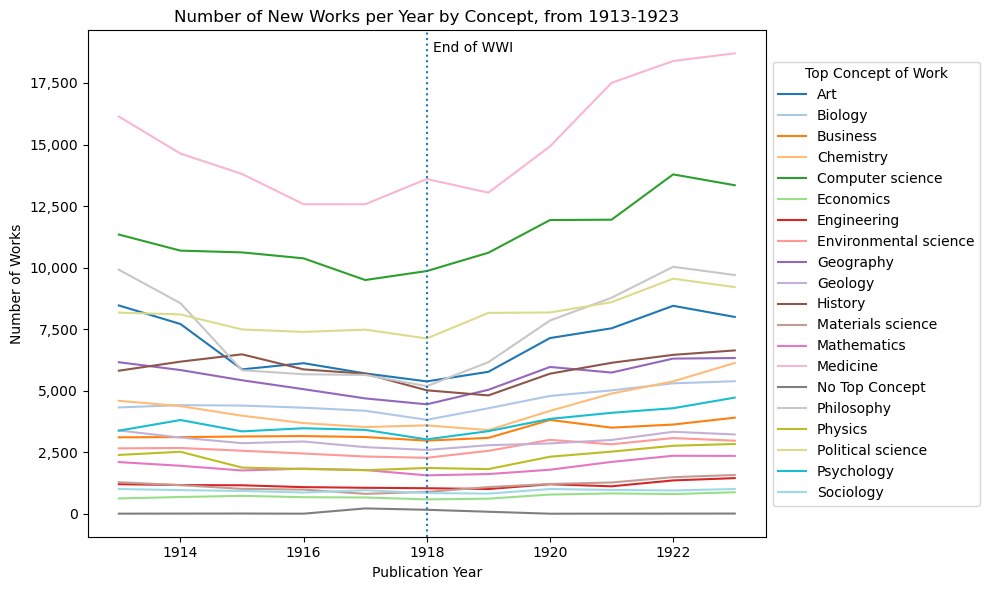

In [401]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df2.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='num_works', label=key)

plt.axvline(x = 1918, linestyle = ':')

plt.text(1918 + 0.1, plt.ylim()[1] - 1000, 'End of WWI', va='bottom')
    
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, from 1913-1923")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

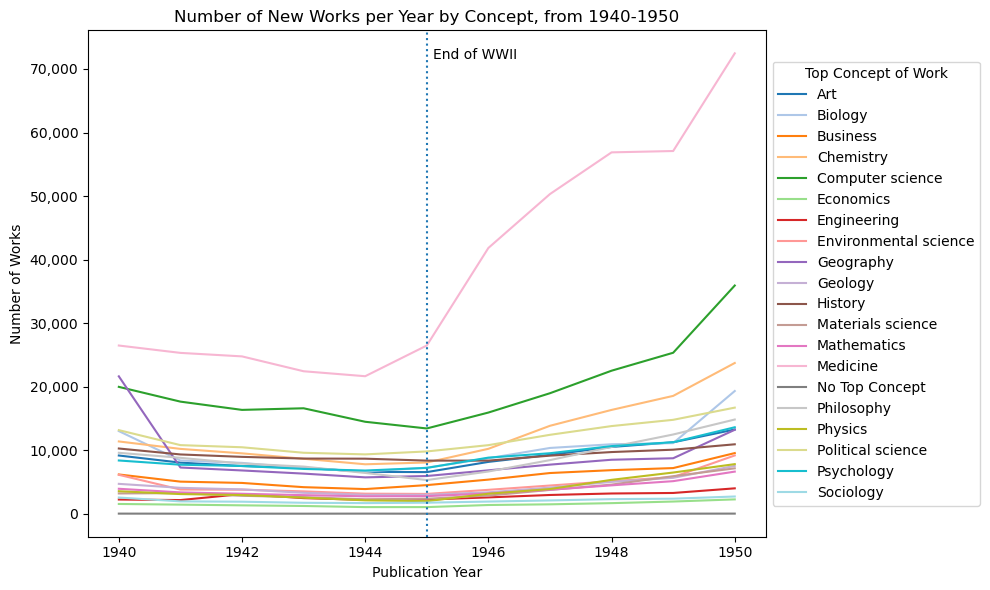

In [402]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df3.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='num_works', label=key)

plt.axvline(x = 1945, linestyle = ':')

plt.text(1945 + 0.1, plt.ylim()[1] - 5000, 'End of WWII', va='bottom')    
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, from 1940-1950")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

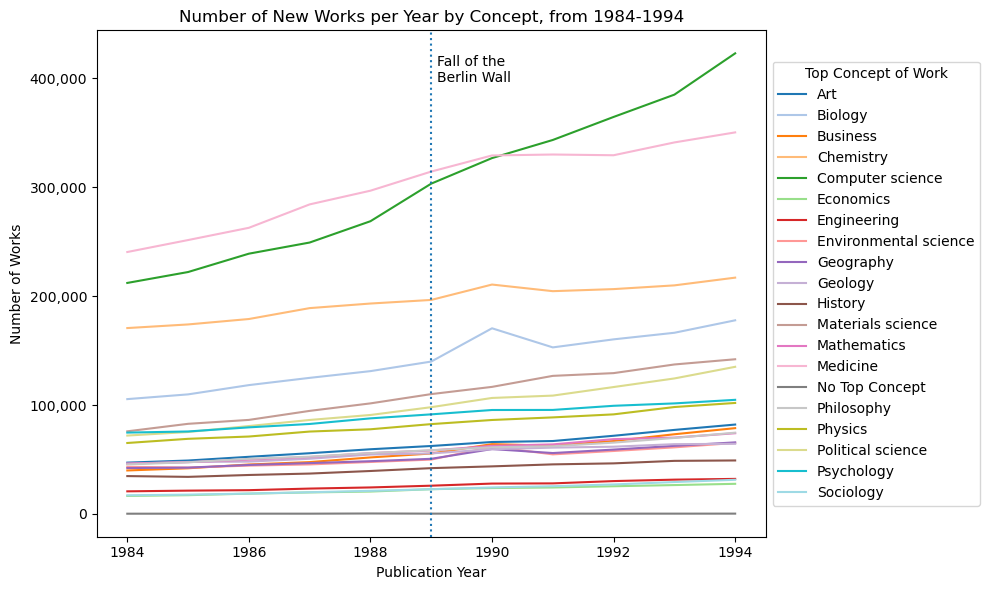

In [403]:
fig, ax = plt.subplots()

cm = plt.get_cmap('tab20')
ax.set_prop_cycle(color=[cm(1.*i/20) for i in range(20)])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

for key, grp in df4.groupby(['concept_0']):
    ax = grp.plot(ax=ax, kind='line', x='publication_year', y='num_works', label=key)

plt.axvline(x = 1989, linestyle = ':')

plt.text(1989 + 0.1, plt.ylim()[1] - 50000, 'Fall of the \nBerlin Wall', va='bottom')
    
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Number of New Works per Year by Concept, from 1984-1994")
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title = "Top Concept of Work")

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

# Total Authors per Year

## Full Data

In [404]:
authors_per_year

,start_yr,concept_0,num_authors
0,1920,NaN,22
1,1930,NaN,23
2,1931,NaN,39
3,1932,NaN,72
4,1933,NaN,56
...,...,...,...
5923,1850,Environmental science,11
5924,1854,Environmental science,11
5925,1843,Environmental science,12
5926,1847,Environmental science,12


In [405]:
df = authors_per_year.groupby("start_yr", as_index = False).sum()
df

,start_yr,num_authors
0,4,2
1,27,3
2,202,1
3,207,2
4,208,4
...,...,...
567,2114,3
568,2115,2
569,2116,3
570,2121,12


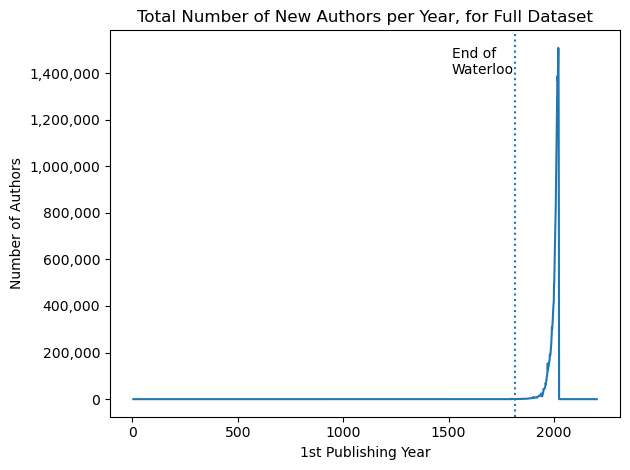

In [406]:
ax = df.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, for Full Dataset")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 - 300, plt.ylim()[1] - 200000, 'End of \nWaterloo', va='bottom')

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Subset

In [407]:
sub_authors_per_year

,start_yr,concept_0,num_authors
0,1920,NaN,22
1,1930,NaN,23
2,1931,NaN,39
3,1932,NaN,72
4,1933,NaN,56
...,...,...,...
5140,1838,Environmental science,16
5141,1861,Environmental science,16
5142,1868,Environmental science,16
5143,1851,Environmental science,17


In [408]:
sub_df = sub_authors_per_year.groupby("start_yr", as_index = False).sum()
sub_df

,start_yr,num_authors
0,1666,12
1,1667,10
2,1668,9
3,1669,22
4,1670,26
...,...,...
342,2008,823145
343,2009,904354
344,2010,970581
345,2011,1036747


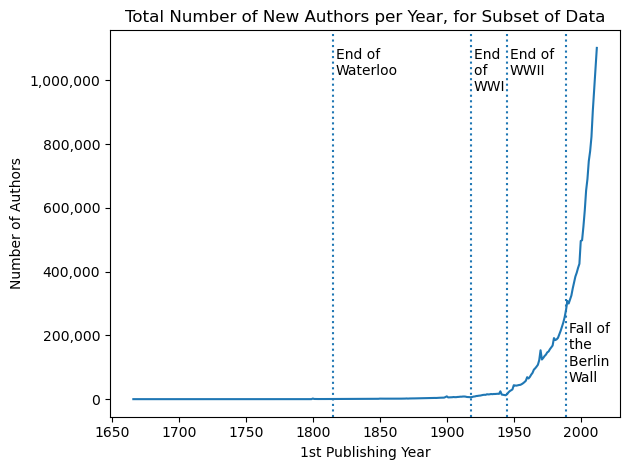

In [409]:
ax = sub_df.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, for Subset of Data")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1815, linestyle = ':')
plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1815 + 2, plt.ylim()[1] - 150000, 'End of \nWaterloo', va='bottom')
plt.text(1918 + 2, plt.ylim()[1] - 200000, 'End \nof \nWWI', va='bottom')
plt.text(1945 + 2, plt.ylim()[1] - 150000, 'End of \nWWII', va='bottom')
plt.text(1989 + 2, plt.ylim()[0] + 100000, 'Fall of \nthe \nBerlin \nWall', va='bottom')

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## 1900-2012

In [410]:
sub_sub_df = sub_df[sub_df["start_yr"] >= 1900].reset_index(drop = True)
sub_sub_df

,start_yr,num_authors
0,1900,8822
1,1901,5467
2,1902,5546
3,1903,5798
4,1904,6028
...,...,...
108,2008,823145
109,2009,904354
110,2010,970581
111,2011,1036747


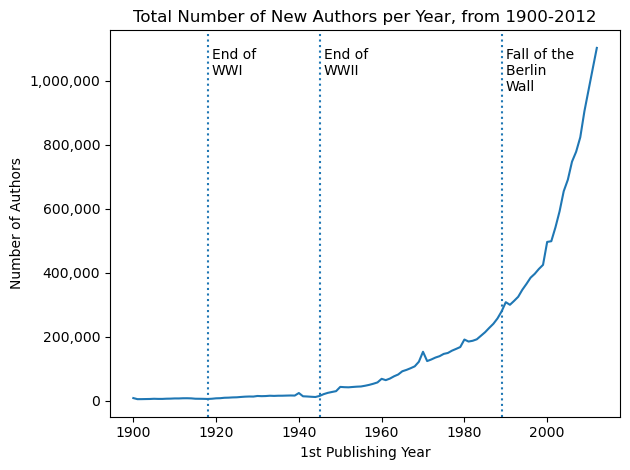

In [411]:
ax = sub_sub_df.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, from 1900-2012")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1918 + 1, plt.ylim()[1] - 150000, 'End of \nWWI', va='bottom')
plt.text(1945 + 1, plt.ylim()[1] - 150000, 'End of \nWWII', va='bottom')
plt.text(1989 + 1, plt.ylim()[1] - 200000, 'Fall of the \nBerlin \nWall', va='bottom')

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Eras

In [412]:
df1 = df[(df["start_yr"] >= 1810) & (df["start_yr"] <= 1820)]
df1

,start_yr,num_authors
331,1810,437
332,1811,409
333,1812,382
334,1813,378
335,1814,389
336,1815,418
337,1816,385
338,1817,358
339,1818,391
340,1819,346


In [413]:
df2 = df[(df["start_yr"] >= 1913) & (df["start_yr"] <= 1923)]
df2

,start_yr,num_authors
434,1913,8337
435,1914,7945
436,1915,6814
437,1916,6643
438,1917,6442
439,1918,6078
440,1919,6796
441,1920,8098
442,1921,8483
443,1922,9798


In [414]:
df3 = df[(df["start_yr"] >= 1940) & (df["start_yr"] <= 1950)]
df3

,start_yr,num_authors
461,1940,24609
462,1941,14445
463,1942,13813
464,1943,12932
465,1944,12205
466,1945,15498
467,1946,21141
468,1947,25161
469,1948,27910
470,1949,30506


In [415]:
df4 = df[(df["start_yr"] >= 1984) & (df["start_yr"] <= 1994)]
df4

,start_yr,num_authors
505,1984,203423
506,1985,214473
507,1986,227967
508,1987,240719
509,1988,257573
510,1989,279790
511,1990,308214
512,1991,300113
513,1992,312194
514,1993,325125


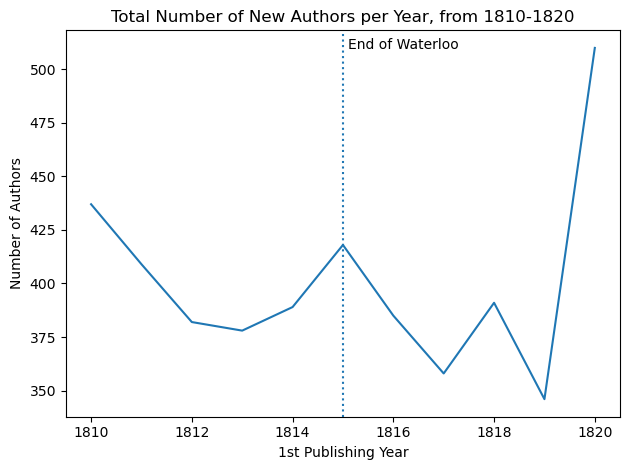

In [416]:
ax = df1.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 + 0.1, plt.ylim()[1] - 10, 'End of Waterloo', va='bottom')
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, from 1810-1820")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

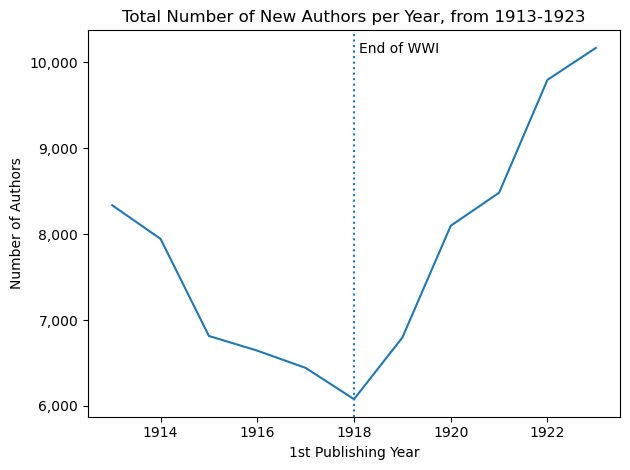

In [417]:
ax = df2.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1918, linestyle = ':')

plt.text(1918 + 0.1, plt.ylim()[1] - 300, 'End of WWI', va='bottom')
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, from 1913-1923")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

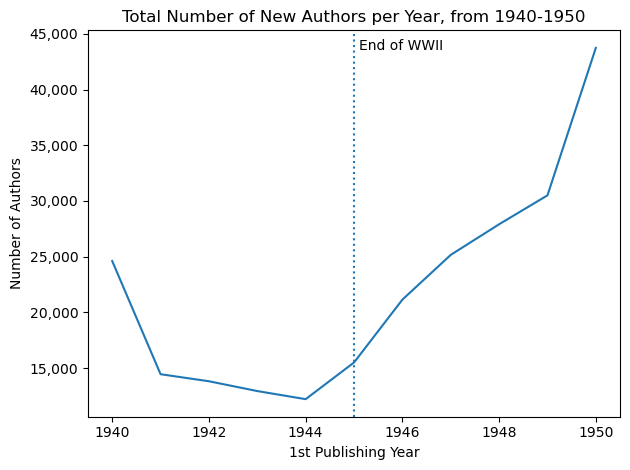

In [418]:
ax = df3.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1945, linestyle = ':')

plt.text(1945 + 0.1, plt.ylim()[1] - 2000, 'End of WWII', va='bottom')    
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, from 1940-1950")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

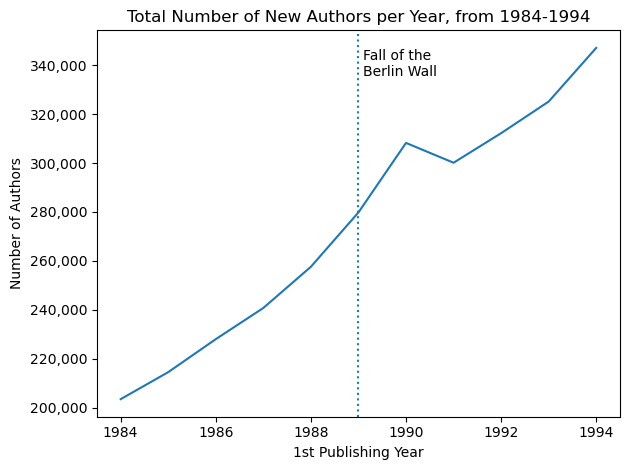

In [419]:
ax = df4.plot(x = "start_yr", y = "num_authors", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1989, linestyle = ':')

plt.text(1989 + 0.1, plt.ylim()[1] - 20000, 'Fall of the \nBerlin Wall', va='bottom')  
    
ax.set_xlabel("1st Publishing Year")
ax.set_ylabel("Number of Authors")
ax.set_title("Total Number of New Authors per Year, from 1984-1994")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

# Total Works per Year

## Full Data

In [420]:
works_per_year

,publication_year,concept_0,num_works
0,1873.0,NaN,21
1,1917.0,NaN,220
2,1918.0,NaN,164
3,1919.0,NaN,85
4,1926.0,NaN,26
...,...,...,...
7901,1709.0,Environmental science,12
7902,1791.0,Environmental science,12
7903,1633.0,Environmental science,14
7904,1769.0,Environmental science,15


In [421]:
df = works_per_year[works_per_year['publication_year'].notnull()].fillna("No Top Concept").sort_values(["concept_0", "publication_year"])
df["publication_year"] = pd.to_numeric(df["publication_year"], downcast = "integer")
df = df.groupby("publication_year", as_index = False).sum()
df

,publication_year,num_works
0,4,1
1,17,1
2,21,2
3,22,2
4,27,2
...,...,...
649,2202,1
650,2203,20
651,2637,1
652,2918,1


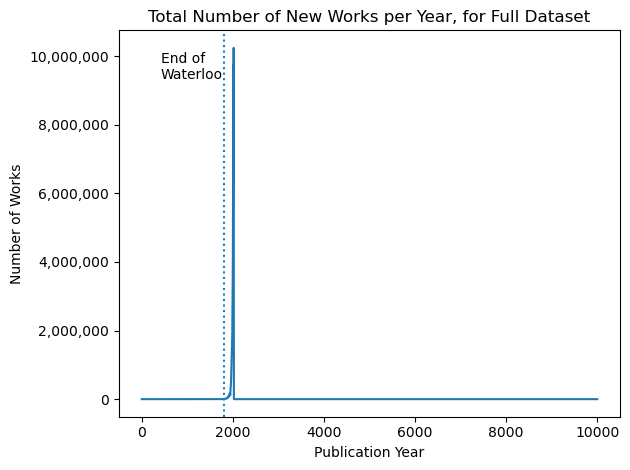

In [422]:
ax = df.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, for Full Dataset")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 - 1400, plt.ylim()[1] - 1500000, 'End of \nWaterloo', va='bottom')

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Subset

In [423]:
sub_works_per_year

,publication_year,concept_0,num_works
0,1873,NaN,21
1,1917,NaN,220
2,1918,NaN,164
3,1919,NaN,85
4,1926,NaN,26
...,...,...,...
6196,1791,Environmental science,12
6197,1769,Environmental science,15
6198,1789,Environmental science,15
6199,1711,Environmental science,17


In [424]:
sub_df = sub_works_per_year.groupby("publication_year", as_index = False).sum()
sub_df

,publication_year,num_works
0,1666,84
1,1667,28
2,1668,97
3,1669,76
4,1670,175
...,...,...
342,2008,6654721
343,2009,7194358
344,2010,7635562
345,2011,8278224


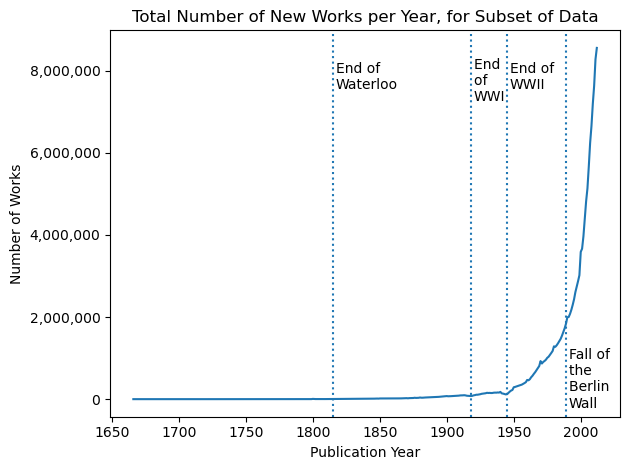

In [425]:
ax = sub_df.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, for Subset of Data")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1815, linestyle = ':')
plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1815 + 2, plt.ylim()[1] - 1500000, 'End of \nWaterloo', va='bottom')
plt.text(1918 + 2, plt.ylim()[1] - 1800000, 'End \nof \nWWI', va='bottom')
plt.text(1945 + 2, plt.ylim()[1] - 1500000, 'End of \nWWII', va='bottom')
plt.text(1989 + 2, plt.ylim()[0] + 150000, 'Fall of \nthe \nBerlin \nWall', va='bottom')

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## 1900-2012

In [426]:
sub_sub_df = sub_df[sub_df["publication_year"] >= 1900].reset_index(drop = True)
sub_sub_df

,publication_year,num_works
0,1900,75075
1,1901,70378
2,1902,73053
3,1903,73038
4,1904,75081
...,...,...
108,2008,6654721
109,2009,7194358
110,2010,7635562
111,2011,8278224


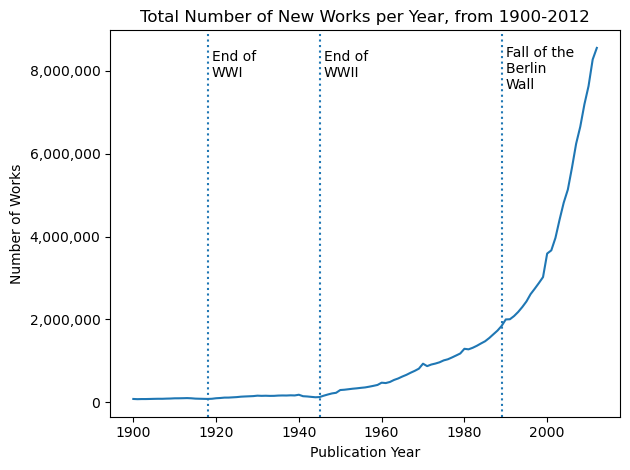

In [427]:
ax = sub_sub_df.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, from 1900-2012")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1918, linestyle = ':')
plt.axvline(x = 1945, linestyle = ':')
plt.axvline(x = 1989, linestyle = ':')

plt.text(1918 + 1, plt.ylim()[1] - 1200000, 'End of \nWWI', va='bottom')
plt.text(1945 + 1, plt.ylim()[1] - 1200000, 'End of \nWWII', va='bottom')
plt.text(1989 + 1, plt.ylim()[1] - 1500000, 'Fall of the \nBerlin \nWall', va='bottom')

fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

## Eras

In [428]:
df1 = df[(df["publication_year"] >= 1810) & (df["publication_year"] <= 1820)]
df1

,publication_year,num_works
375,1810,2514
376,1811,2516
377,1812,2324
378,1813,2209
379,1814,2214
380,1815,3080
381,1816,2940
382,1817,2593
383,1818,2879
384,1819,2502


In [429]:
df2 = df[(df["publication_year"] >= 1913) & (df["publication_year"] <= 1923)]
df2

,publication_year,num_works
478,1913,96060
479,1914,91653
480,1915,83302
481,1916,80340
482,1917,77810
483,1918,75839
484,1919,80105
485,1920,92500
486,1921,98390
487,1922,107705


In [430]:
df3 = df[(df["publication_year"] >= 1940) & (df["publication_year"] <= 1950)]
df3

,publication_year,num_works
505,1940,177090
506,1941,141738
507,1942,135529
508,1943,125702
509,1944,116223
510,1945,121175
511,1946,153941
512,1947,182967
513,1948,208926
514,1949,224394


In [431]:
df4 = df[(df["publication_year"] >= 1984) & (df["publication_year"] <= 1994)]
df4

,publication_year,num_works
549,1984,1415998
550,1985,1469323
551,1986,1547339
552,1987,1637780
553,1988,1727365
554,1989,1840625
555,1990,1996560
556,1991,2001358
557,1992,2078242
558,1993,2178083


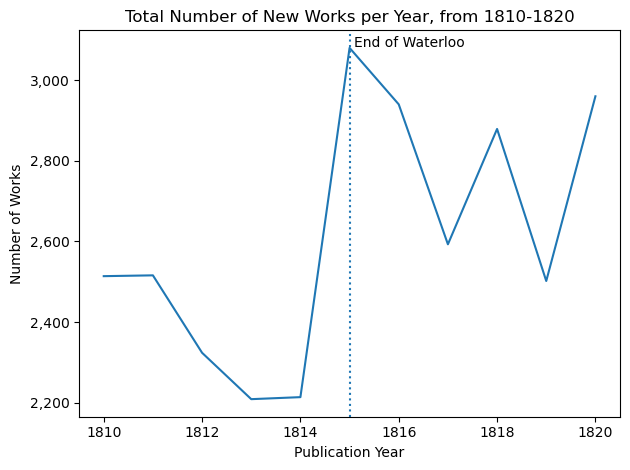

In [432]:
ax = df1.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1815, linestyle = ':')

plt.text(1815 + 0.1, plt.ylim()[1] - 50, 'End of Waterloo', va='bottom')
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, from 1810-1820")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

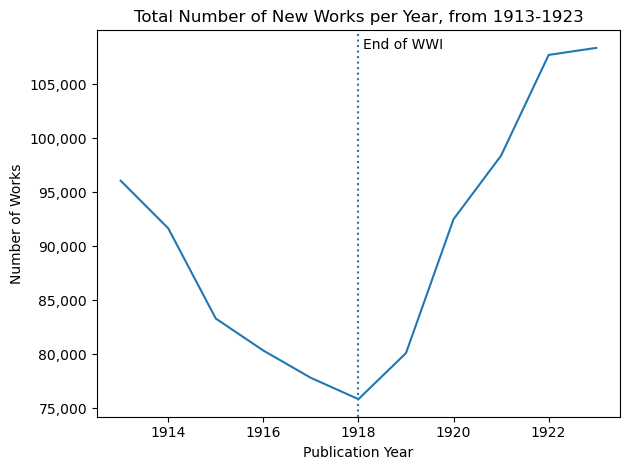

In [433]:
ax = df2.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1918, linestyle = ':')

plt.text(1918 + 0.1, plt.ylim()[1] - 2000, 'End of WWI', va='bottom')
   
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, from 1913-1923")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

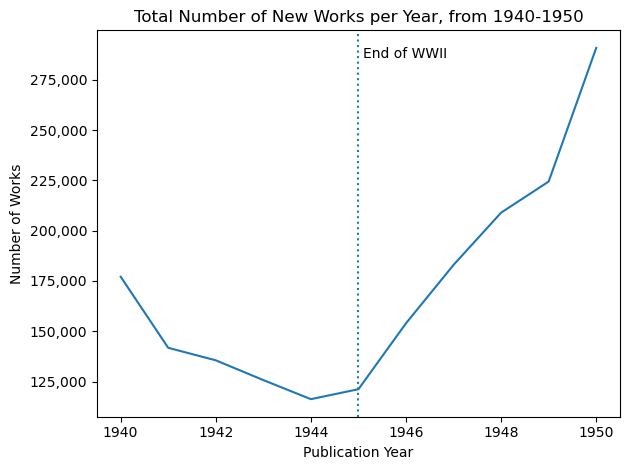

In [434]:
ax = df3.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1945, linestyle = ':')

plt.text(1945 + 0.1, plt.ylim()[1] - 15000, 'End of WWII', va='bottom')    
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, from 1940-1950")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()

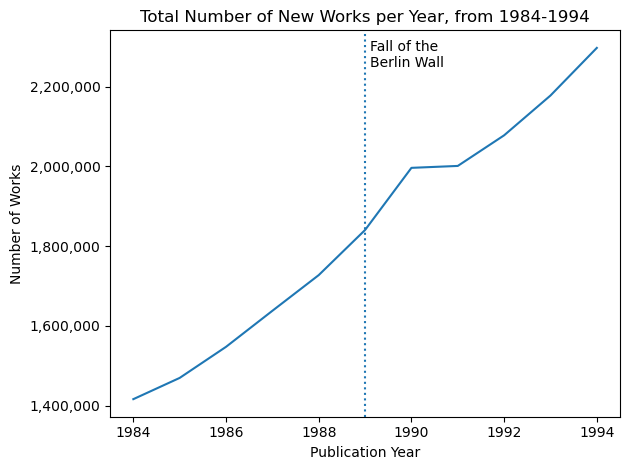

In [435]:
ax = df4.plot(x = "publication_year", y = "num_works", kind = "line", legend = False)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.axvline(x = 1989, linestyle = ':')

plt.text(1989 + 0.1, plt.ylim()[1] - 100000, 'Fall of the \nBerlin Wall', va='bottom')
    
    
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Works")
ax.set_title("Total Number of New Works per Year, from 1984-1994")
    
fig.set_size_inches(10, 6)  # Set the figure size (width, height)
plt.tight_layout()

plt.savefig('EXPORT_DEST.svg')

plt.show()